# Climate, oceans and data

Author: [Dr. Chelle Gentemann](https://cgentemann.github.io).

This notebook accompanies a lecture for Berkeley's Data 100 that covers the fundamental physical mechanisms behind global warming and analyzes CO2 and ocean temperature data.

The original resides in [this github repository](https://github.com/cgentemann/d100_gentemann), this is a copy kept as part of the class materials.

Copyright (c) 2021 Chelle Gentemann, [MIT Licensed](https://opensource.org/licenses/MIT).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

## Calculate $E_{in}$ = $E_{out}$

In [2]:
# Solve for T (slide 15)
Ω = 1372  # W/m2 incoming solar
σ = 5.67e-8  # stephan boltzman constant W/m2/K4
A = 0.3
T = ((Ω * (1 - A)) / (4 * σ)) ** 0.25
print("Temperature =", "%.2f" % T, "K")

Temperature = 255.10 K


### calculate greenhouse effect
- bonus points for greek letters
- to get a sigma type '\sigma' then hit tab

In [3]:
# standard values
Ω = 1372  # W/m2 incoming solar
σ = 5.67e-8  # stephan boltzman constant W/m2/K4
T = 288  # temperature K
E = (T ** 4) * σ - (Ω * (1 - A)) / 4
print("greenhouse effect:", "%.2f" % E, "W m-2")

greenhouse effect: 149.98 W m-2


## Experiment
- Solve for the temperature, so that you can see how changes in albedo and greenhouse effect impact T

In [4]:
# Solve for T, including the greenhouse effect
Tnew = (((Ω * (1 - A)) / 4 + E) / σ) ** 0.25
print("temperature =", Tnew, "K")

temperature = 288.0 K


### calculate what a change in the greenhouse effect does to temperature
- what if you increase E by 10%

In [5]:
Enew = E * 1.1
Tnew = (((Ω * (1 - 0.3)) / 4 + Enew) / σ) ** 0.25
print("temperature =", "%.2f" % Tnew)
print(
    "10% increase in E leads to ",
    "%.2f" % (Tnew - T),
    " degree K increase in temperature",
)
print(
    "10% increase in E leads to ",
    "%.2f" % (100 * ((Tnew - T) / T)),
    "% increase in temperature",
)

temperature = 290.73
10% increase in E leads to  2.73  degree K increase in temperature
10% increase in E leads to  0.95 % increase in temperature


In [6]:

# read in data and print some

from pathlib import Path

DATA_DIR = Path('./shared/climate-data')

monthly_2deg_path = DATA_DIR / "era5_monthly_2deg_aws_v20210920.nc"
# download the file via <https://drive.google.com/file/d/1hcwRp51gX0ah9zCHUmK07sNr_g1Hsdqf/view?usp=sharing>

file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(file)
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


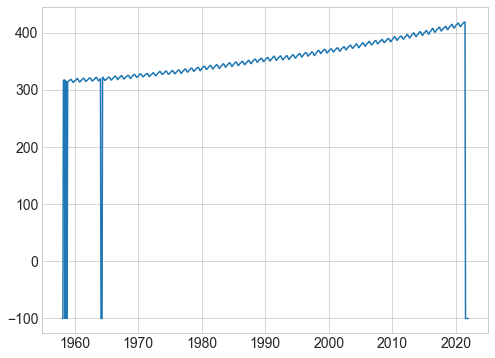

In [7]:
# plot the CO2, note the -99 values you see above showing up in the plot
plt.plot(data["fraction_date"], data["c02"]);

In [8]:
# get rid of missing values that are set to -99.99
file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(file, na_values=-99.99)
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
0,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


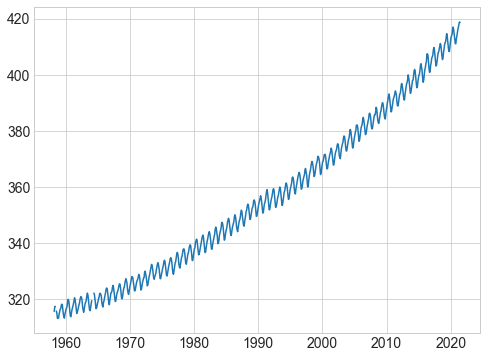

In [9]:
# plot the data again
plt.plot(data["fraction_date"], data["c02"]);

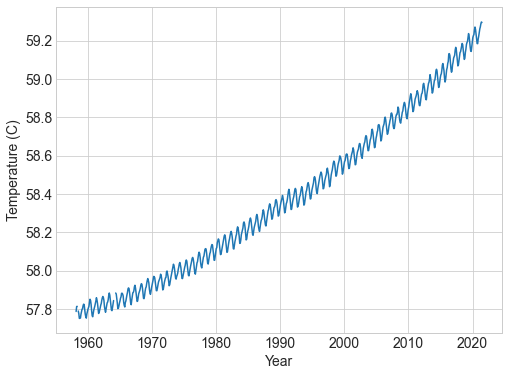

In [10]:
# use the CO2 in the equation given in class to calculate the greenhouse effect
# then calculate the increase in temperature in deg C rather than K
E = 133.26 + 0.044 * data["c02"]
# calculate new temperature
data["Tnew"] = (((Ω * (1 - 0.3)) / 4 + E) / σ) ** 0.25
plt.plot(data["fraction_date"], (data["Tnew"] - 273.15) * 9 / 5 + 32)
plt.xlabel("Year"), plt.ylabel("Temperature (C)");

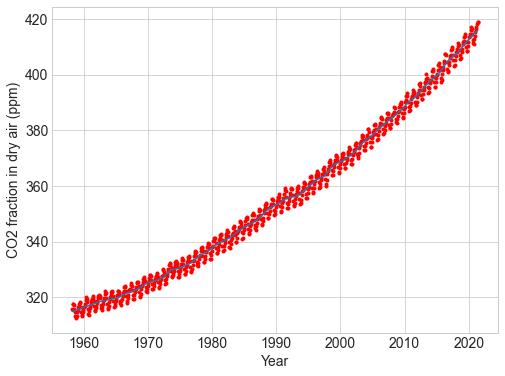

In [11]:
# explore the different data provided in the dataset, what are they?
# can you guess from the names and explain how they were calulated?
# can you re-calculate them? can you re-make the figure in the talk?
plt.plot(data["fraction_date"], data["data_filled"], "r.")
plt.plot(data["fraction_date"], data["data_adjusted_seasonally_fit"])
plt.ylabel("CO2 fraction in dry air (ppm)"), plt.xlabel("Year");

In [12]:
# calculate the annual cycle using groupby
annual = data.groupby(data.month).mean()
annual.head()

,year,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed,Tnew
month,,,,,,,,,,
1,1989.5,32705.25,1989.541075,356.468571,356.421111,356.461270,356.400952,356.468571,356.421111,287.808514
2,1989.5,32736.25,1989.625925,357.840645,357.139355,357.248889,356.537778,357.240317,356.539841,287.819681
3,1989.5,32764.50,1989.703250,357.965238,356.544603,357.443906,356.010000,357.383750,355.964375,287.820691
4,1989.5,32795.50,1989.788175,359.331270,356.773175,358.718906,356.144844,358.745469,356.190000,287.831802
5,1989.5,32825.50,1989.870325,359.363125,356.253281,359.383750,356.277031,359.363125,356.253281,287.832057


In [13]:
# calculate the anomaly
anomaly = annual - annual.mean()

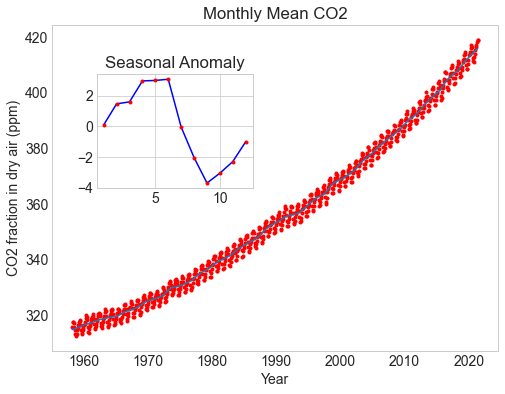

In [14]:
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
axin1.plot(anomaly.c02, "b")
axin1.plot(anomaly.c02, "r.")
axin1.set_title("Seasonal Anomaly");

In [15]:
# reading the C02 data from the base file rather than the cleaned up one.
file = DATA_DIR / "monthly_in_situ_co2_mlo.csv"
column_names = [
    "year",
    "month",
    "date_index",
    "fraction_date",
    "c02",
    "data_adjusted_season",
    "data_fit",
    "data_adjusted_seasonally_fit",
    "data_filled",
    "data_adjusted_seasonally_filed",
]
data = pd.read_csv(file, header=0, skiprows=56, names=column_names)
data.head()

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71


## using xarray to explore era5 data

In [16]:
#!pip install xarray

#In Anaconda prompt
#$ conda install -c conda-forge xarray dask netCDF4 bottleneck

In [17]:
import xarray as xr

ds = xr.open_dataset(DATA_DIR / "era5_monthly_2deg_aws_v20210920.nc")
# download the file via <https://drive.google.com/file/d/1hcwRp51gX0ah9zCHUmK07sNr_g1Hsdqf/view?usp=sharing>
ds

<xarray.Dataset>
Dimensions:                                                                                   (time: 504, latitude: 90, longitude: 180)
Coordinates:
  * time                                                                                      (time) datetime64[ns] ...
  * latitude                                                                                  (latitude) float32 ...
  * longitude                                                                                 (longitude) float32 ...
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres                                                               (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres_1hour_Maximum                                                 (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres_1hour_Minimum                                                 (time, latitude, longitude) float32 ...
    dew_point_temperature_at_2_metres                                                         (time, latitude, longitude) float32 ...
    eastward_wind_at_100_metres                                                               (time, latitude, longitude) float32 ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              (time, latitude, longitude) float32 ...
    northward_wind_at_10_metres                                                               (time, latitude, longitude) float32 ...
    precipitation_amount_1hour_Accumulation                                                   (time, latitude, longitude) float32 ...
    sea_surface_temperature                                                                   (time, latitude, longitude) float32 ...
    snow_density                                                                              (time, latitude, longitude) float32 ...
    surface_air_pressure                                                                      (time, latitude, longitude) float32 ...
Attributes:
    institution:  ECMWF
    source:       Reanalysis
    title:        ERA5 forecasts

In [18]:
ds.dims

Frozen({'time': 504, 'latitude': 90, 'longitude': 180})

In [19]:
ds.coords

Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T11:30:00 ... 2020-12-16T11:30:00
  * latitude   (latitude) float32 -88.88 -86.88 -84.88 ... 85.12 87.12 89.12
  * longitude  (longitude) float32 0.875 2.875 4.875 6.875 ... 354.9 356.9 358.9

In [20]:
# two ways to print out the data for temperature at 2m
ds["air_temperature_at_2_metres"]
ds.air_temperature_at_2_metres

<xarray.DataArray 'air_temperature_at_2_metres' (time: 504, latitude: 90, longitude: 180)>
[8164800 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T11:30:00 ... 2020-12-16T11:30:00
  * latitude   (latitude) float32 -88.88 -86.88 -84.88 ... 85.12 87.12 89.12
  * longitude  (longitude) float32 0.875 2.875 4.875 6.875 ... 354.9 356.9 358.9
Attributes:
    long_name:       2 metre temperature
    nameCDM:         2_metre_temperature_surface
    nameECMWF:       2 metre temperature
    product_type:    analysis
    shortNameECMWF:  2t
    standard_name:   air_temperature
    units:           K

In [21]:
# different ways to access the data using index, isel, sel
temp = ds.air_temperature_at_2_metres
print(temp[0, 63, 119].data)
print(temp.isel(time=0, latitude=63, longitude=119).data)
print(temp.sel(time="1979-01", latitude=37.125, longitude=238.875).data)
print(temp.latitude[63].data)
print(temp.longitude[119].data)

280.93103
280.93103
[280.93103]
37.125
238.875


## .isel versus .sel
- .isel is endpoint EXclusive
- .sel is endpoint INclusive

In [22]:
temp = ds.air_temperature_at_2_metres
point1 = temp.isel(time=0, latitude=63, longitude=119)
point2 = temp.sel(time="1979-01", latitude=37.125, longitude=238.875)
area1 = temp.isel(time=0, latitude=slice(63, 65), longitude=slice(119, 125))
area2 = temp.sel(
    time="1979-01",
    latitude=slice(temp.latitude[63], temp.latitude[65]),
    longitude=slice(temp.longitude[119], temp.longitude[125]),
)

In [23]:
print("area1 uses isel")
# print(area1.dims)
print(area1.latitude.data)
print(area1.longitude.data)

area1 uses isel
[37.125 39.125]
[238.875 240.875 242.875 244.875 246.875 248.875]


In [24]:
print("area2 uses sel")
# print(area2.dims)
print(area2.latitude.data)
print(area2.longitude.data)

area2 uses sel
[37.125 39.125 41.125]
[238.875 240.875 242.875 244.875 246.875 248.875 250.875]


In [25]:
point = ds.sel(time="1979-01", latitude=37.125, longitude=238.875)
area = ds.sel(
    time="1979-01",
    latitude=slice(temp.latitude[63], temp.latitude[65]),
    longitude=slice(temp.longitude[119], temp.longitude[125]),
)

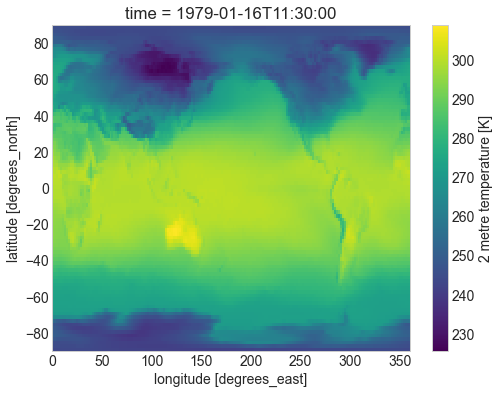

In [26]:
ds.air_temperature_at_2_metres.sel(time="1979-01").plot();

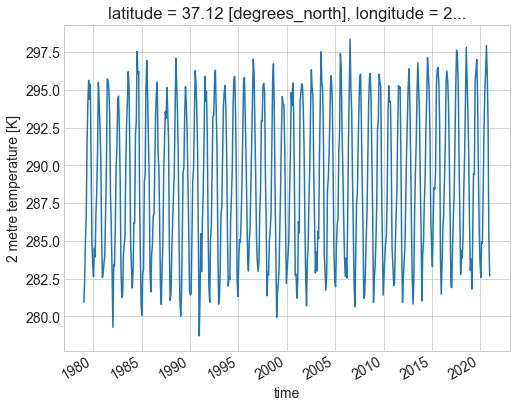

In [27]:
ds.air_temperature_at_2_metres.sel(latitude=37.125, longitude=238.875).plot();

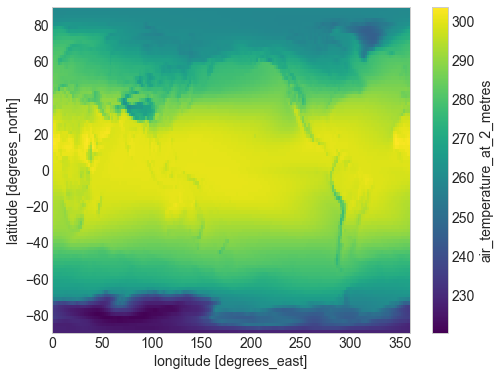

In [28]:
# ds.air_temperature_at_2_metres.mean("time").plot()
mean_map = ds.mean("time")  # takes the mean across all variables in ds
mean_map.air_temperature_at_2_metres.plot();

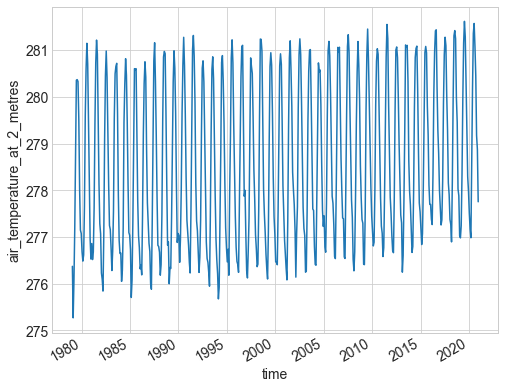

In [29]:
# calculate a map of the mean values across all time
ave = ds.mean(("latitude", "longitude"))
ave.air_temperature_at_2_metres.plot();

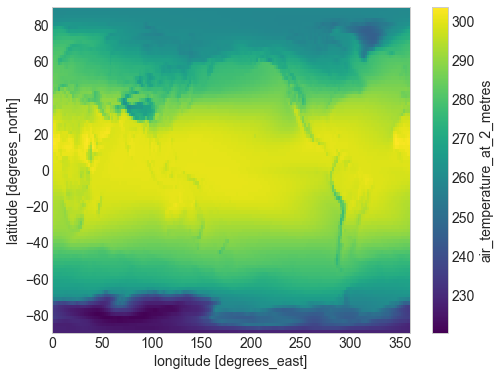

In [30]:
# calculate a map of the mean values across all time
ave = ds.mean("time")
ave.air_temperature_at_2_metres.plot();

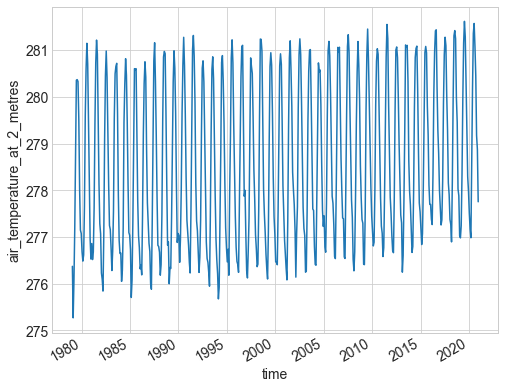

In [31]:
# calculate a map of the mean values across all time
ave = ds.mean(("latitude", "longitude"))
ave.air_temperature_at_2_metres.plot();

In [32]:
ave = ds.mean(keep_attrs=True)
ave

<xarray.Dataset>
Dimensions:                                                                                   ()
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            float32 ...
    air_temperature_at_2_metres                                                               float32 ...
    air_temperature_at_2_metres_1hour_Maximum                                                 float32 ...
    air_temperature_at_2_metres_1hour_Minimum                                                 float32 ...
    dew_point_temperature_at_2_metres                                                         float32 ...
    eastward_wind_at_100_metres                                                               float32 ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              float32 ...
    northward_wind_at_10_metres                                                               float32 ...
    precipitation_amount_1hour_Accumulation                                                   float32 ...
    sea_surface_temperature                                                                   float32 ...
    snow_density                                                                              float32 ...
    surface_air_pressure                                                                      float32 ...
Attributes:
    institution:  ECMWF
    source:       Reanalysis
    title:        ERA5 forecasts

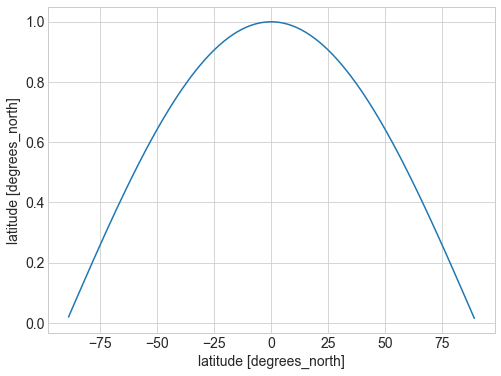

In [33]:
weights = np.cos(np.deg2rad(ds.latitude))
weights.name = "weights"
weights.plot();

In [34]:
ds_weighted = ds.weighted(weights)
weighted_mean = ds_weighted.mean()
weighted_mean

<xarray.Dataset>
Dimensions:                                                                                   ()
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            float64 ...
    air_temperature_at_2_metres                                                               float64 ...
    air_temperature_at_2_metres_1hour_Maximum                                                 float64 ...
    air_temperature_at_2_metres_1hour_Minimum                                                 float64 ...
    dew_point_temperature_at_2_metres                                                         float64 ...
    eastward_wind_at_100_metres                                                               float64 ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              float64 ...
    northward_wind_at_10_metres                                                               float64 ...
    precipitation_amount_1hour_Accumulation                                                   float64 ...
    sea_surface_temperature                                                                   float64 ...
    snow_density                                                                              float64 ...
    surface_air_pressure                                                                      float64 ...

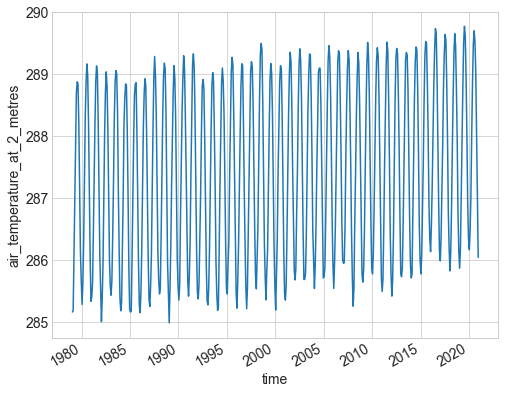

In [35]:
ds_weighted = ds.weighted(weights)
weighted_mean = ds_weighted.mean(("latitude", "longitude"))
weighted_mean.air_temperature_at_2_metres.plot();

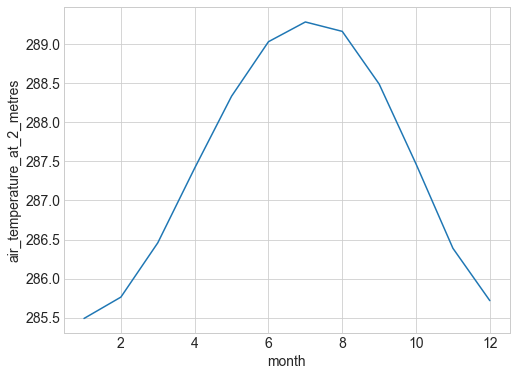

In [36]:
# calculate the annual cycle
annual_cycle = weighted_mean.groupby("time.month").mean()
annual_cycle.air_temperature_at_2_metres.plot();

In [37]:
# calculate the annual cycle at a point
weighted_trend = (
    weighted_mean.groupby("time.month") - annual_cycle + annual_cycle.mean()
)

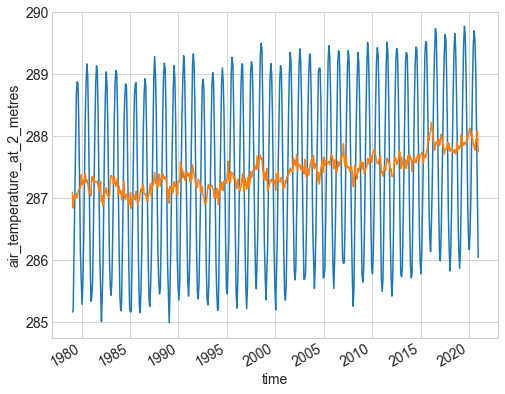

In [38]:
weighted_mean.air_temperature_at_2_metres.plot()
weighted_trend.air_temperature_at_2_metres.plot();

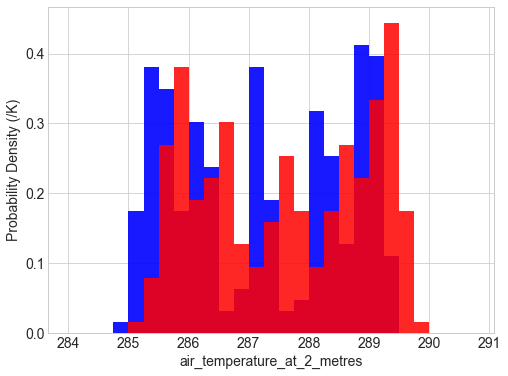

In [39]:
bins = np.arange(284, 291, 0.25)
xr.plot.hist(
    weighted_mean.air_temperature_at_2_metres.sel(time=slice("1980", "2000")),
    bins=bins,
    density=True,
    alpha=0.9,
    color="b",
)
xr.plot.hist(
    weighted_mean.air_temperature_at_2_metres.sel(time=slice("2000", "2020")),
    bins=bins,
    density=True,
    alpha=0.85,
    color="r",
)
plt.ylabel("Probability Density (/K)");

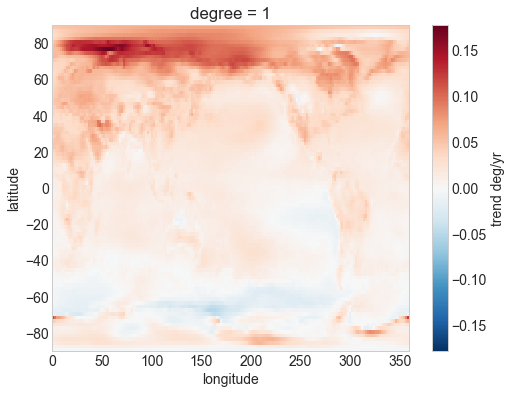

In [40]:
pfit = ds.air_temperature_at_2_metres.polyfit("time", 1)
pfit.polyfit_coefficients[0] *= 3.154000000101e16  # go from nanosecond to year
pfit.polyfit_coefficients[0].plot(cbar_kwargs={"label": "trend deg/yr"});

In [41]:
np.timedelta64(1, "Y")
# /np.timedelta64(1,'s').data
pfit.polyfit_coefficients[0, 80, 10] * 3.154000000101e16

<xarray.DataArray 'polyfit_coefficients' ()>
array(1.32898438e+15)
Coordinates:
    degree     int32 1
    latitude   float64 71.12
    longitude  float64 20.88

In [53]:
#!pip install wheel
#!pip install *\Cartopy-0.20.1-cp38-cp38-win_amd64.whl

#Download cartopy whl file via https://www.lfd.uci.edu/~gohlke/pythonlibs/#cartopy
# based on your PC's CPU bit and Python version
# reference http://py3dtech.com/?p=61

Processing c:\users\koiso\documents\cartopy-0.20.1-cp38-cp38-win_amd64.whl
  Attempting uninstall: pyproj
    Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


C:\Users\koiso\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


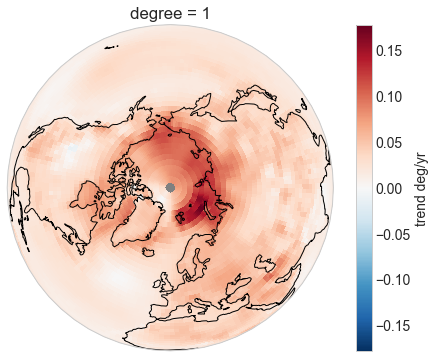

In [54]:
import cartopy.crs as ccrs

p = pfit.polyfit_coefficients[0].plot(
    subplot_kws=dict(projection=ccrs.Orthographic(0, 90), facecolor="gray"),
    transform=ccrs.PlateCarree(central_longitude=0),
    cbar_kwargs={"label": "trend deg/yr"},
)

p.axes.coastlines();

- Subset all variables to just the Arctic

In [45]:
arctic_ds_weighted = ds.sel(latitude=slice(70,90)).weighted(weights)
arctic_weighted_mean = arctic_ds_weighted.mean(("latitude", "longitude"))
arctic_annual_cycle = arctic_weighted_mean.groupby("time.month").mean()
arctic_weighted_trend = (
    arctic_weighted_mean.groupby("time.month") - arctic_annual_cycle + arctic_annual_cycle.mean()
)

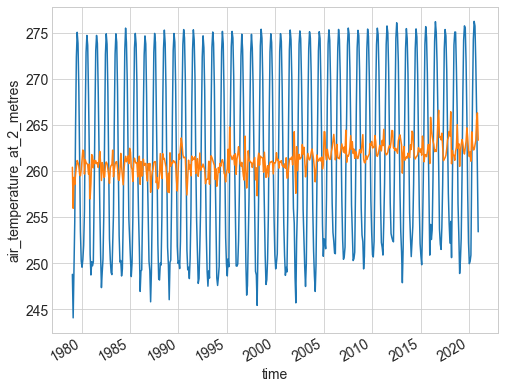

In [46]:
arctic_weighted_mean.air_temperature_at_2_metres.plot()
arctic_weighted_trend.air_temperature_at_2_metres.plot();

In [47]:
def linear_trend(x, y):
    pf = np.polyfit(x, y, 1)
    return pf[0]

x = arctic_weighted_mean.time.dt.year
y = arctic_weighted_mean.air_temperature_at_2_metres
arctic_trend = linear_trend(x, y)
x = weighted_mean.time.dt.year
y = weighted_mean.air_temperature_at_2_metres
trend = linear_trend(x, y)
print('linear trend: global=',trend,'arctic', arctic_trend)

linear trend: global= 0.01919817333975193 arctic 0.07604532571793854


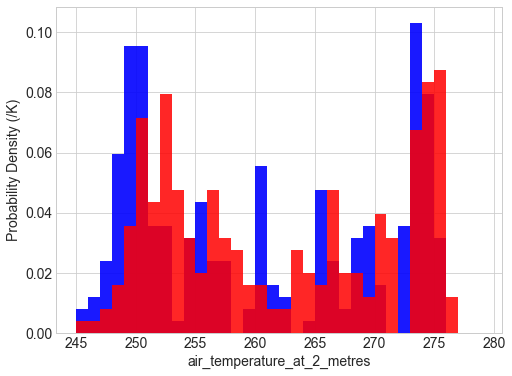

In [48]:
bins = np.arange(245, 280, 1)
xr.plot.hist(
    arctic_weighted_mean.air_temperature_at_2_metres.sel(time=slice("1980", "2000")),
    bins=bins,
    density=True,
    alpha=0.9,
    color="b",
)
xr.plot.hist(
    arctic_weighted_mean.air_temperature_at_2_metres.sel(time=slice("2000", "2020")),
    bins=bins,
    density=True,
    alpha=0.85,
    color="r",
)
plt.ylabel("Probability Density (/K)");